### Data
The following is a quick analysis of the data we used for this assignment:
* The data was taken from Kaggle website
* The  folder that was downloaded had 5 years of data. That is 5 ".csv" files 

Before we begin creating our clusters, let us see what value of K parameter is the best option for us. We will use the "elbow method" do find the best K value. The algorithm presented in class, was to loop through each K value iteratively and calculate the cost function. We then graph these values, and where there is an "elbow" we choose our K to be the tip of that elbow. 

Our goal was to accept 3 sensible K values and use them for our clustering script. 
* We began by importing our data.
* We then created two data frames. Both data frames will contain the features we need, but the difference will be that one of these dataframes will be normalized.
* We then ran our iterative loop for K values for both dataframes, saved the K and their corresponding cost values and created a plot to represent them.
* At the end we added the ratios to the normalized dataframe and did the same iterative step.

Let us see the results.

In [8]:
# Import the pacakges we need for this script.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #this is used for plot styling


# Begin by reading the original data.
df1 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame with features taken directly from the real data (df1).
# These features are also included in evaluating ratios but we start by using the raw values.
financial_data = pd.DataFrame(df1, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given.
nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans

# Drop the symbols. If we keep the symbols then KMeans will not work since they are strings.
financial_data = financial_data.drop('Symbol', 1)

# Normalize the financial data.
# Each featrue are in large dollar values, whereas some have variance. We are also going to add the ratios later. Therfore it 
# is a good idea to normalize the data before we do our clustering.
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']

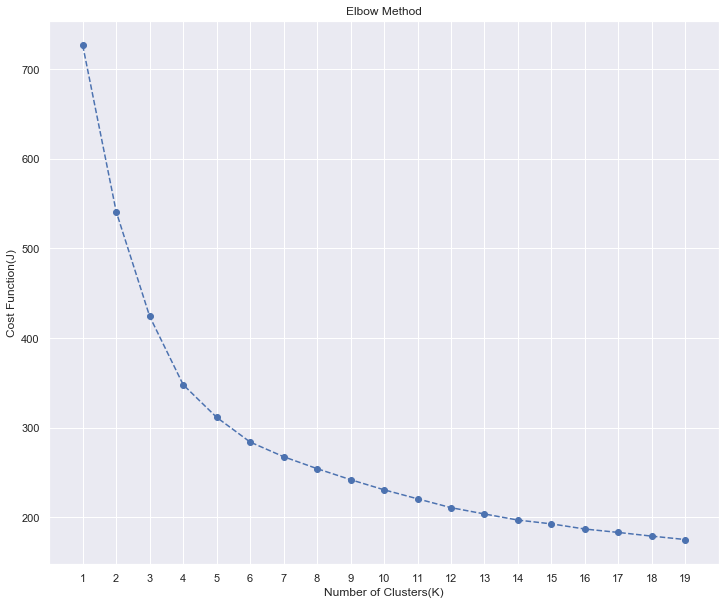

347.93608596908007


In [9]:
# Initialize the score values array and number of clusters for out loop. we used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) #using the normalized data

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[3])

The cost amount is lower this time due to normalization. However we have a hard time to find our elbow. If we look really closely that at $K=4$ can be a good "elbow".

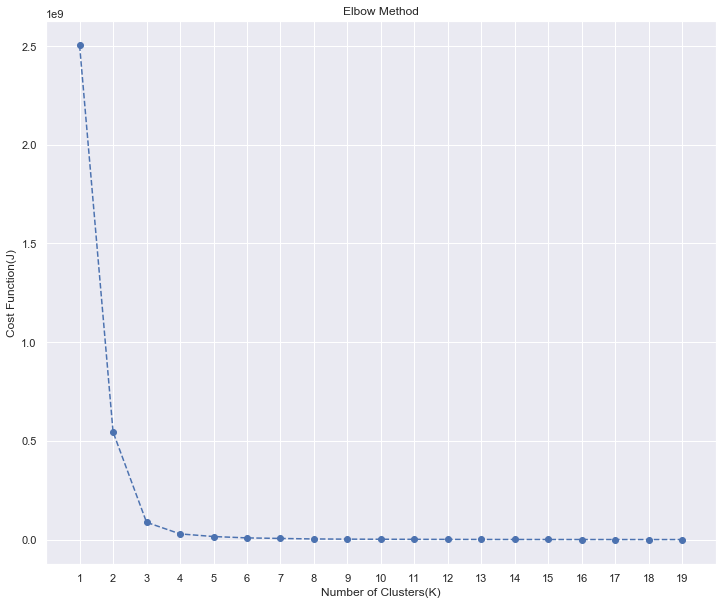

87689817.62949847


In [10]:
# Calculate earnings per share ratio
financial_data_norm['EarningsPerShare'] = (df1['Net Income'] - df1['Preferred Dividends']) / df1['Weighted Average Shs Out']

# Get the P/E ratio directly from data
financial_data_norm['PriceEarningsRatio'] = df1['PE ratio']

# Calculate debt to equity ratio
financial_data_norm['DebtEquityRatio'] = (df1['Short-term debt'] + df1['Long-term debt']) / df1['Total shareholders equity']

# Get the return on equity ratio
financial_data_norm['ReturnOnEquity'] = df1['returnOnEquity']

# Get the quick ratio
financial_data_norm['QuickRatio'] = df1['quickRatio']

# Calculate the working capital ratio
financial_data_norm['WorkingCapitalRatio'] = df1['Total current assets'] / df1['Total current liabilities']

# Get rid of empty values from the date given
nan_value = float("NaN")
financial_data_norm.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_norm.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_norm.dropna(axis=0, inplace = True) #get rid of nans


# Initialize the score values array and number of clusters for out loop. we used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) #using the normalized data

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[2])

We begin using the $K$ values we found from our elbow method and use it on our data. We found that if we use 
$K = 4$ and $K = 5$ we can get good clusters from the data given to us. We can also use $K=3$ but we need to bring the amount of risk as low as possible. In other words we like to be risk averse, even in finding the healthy companies.

We do this year by year. Every year will give us 9 clusters. 
That means we will have 4 clusters when $K=4$ and 5 when $K=5$. Each cluster will present companies that are healthy, semi healthy, not healthy and very bad.

Now the question will be how do we choose the best cluster from differnet $K$ values. We have high dimenstion data ($>$3D), so we cannot examine them visually. Therefore we need to use a feature as an indicator that belongs to a healthy company. We know that a good company has high revenues. High revenue indicates that a company is managing its wealth very well, has a good marketing department and is able to pay outstanding debt at the end of the year. We can also use net income as well but there are some issues with only using net income. We will further dicuss these issues in the project paper.

High revenue, however, does not mean a company is healthy, as we are ACTUALLY trying to find the healthy companies using clustering. It only means that a company's stock will be higher at the end of the year, since there is more demand for the stock as this is highly correlated with high revenue. This will be our "healthy" stocks. 

We will do this one by one for each year. There is an easier way to do this but we want to see our portfolio at the end of each year and see what are the reasons we have this portfolio.

In [11]:
# Import the libraries we need for this project
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Begin by reading the original data
df2018 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame we need with extra features taken directly from the real data (df)
financial_data_2018 = pd.DataFrame(df2018, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given
nan_value = float("NaN")
financial_data_2018.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_2018.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_2018.dropna(axis=0, inplace = True) #get rid of nans

# Save the original data frame as target data frame
target_data_2018 = financial_data_2018

# Drop the symbols for KMeans
financial_data_2018 = financial_data_2018.drop('Symbol', 1)



# KMeans algorithm starts here
kmeans = KMeans(n_clusters = 4,  random_state=None) # No matter what state, the output are the same companies
kmeans.fit(financial_data_2018)
y_k4means = kmeans.predict(financial_data_2018)

kmeans = KMeans(n_clusters = 5,  random_state=None)
kmeans.fit(financial_data_2018)
y_k5means = kmeans.predict(financial_data_2018)

# This loop finds the average "Revenue" of each cluster (using 2 different cluster sizes) in each cluster size
# It then indentifies the largest average and its associated cluster
# The output are the companies within these "top" clusters
largestMean_k4 = 0
largestMean_k5 = 0
for i in range(5):
    nportfolio_k5 = pd.DataFrame(target_data_2018.loc[y_k5means == i, 'Revenue']).to_numpy()
    mean_k5 = nportfolio_k5.mean()
    if mean_k5 > largestMean_k5:
        largestMean_k5 = mean_k5
        cl_num_k5 = i 
        
    if i < 4:
        nportfolio_k4 = pd.DataFrame(target_data_2018.loc[y_k4means == i, 'Revenue']).to_numpy()
        mean_k4 = nportfolio_k4.mean()
    if mean_k4 > largestMean_k4:
        largestMean_k4 = mean_k4
        cl_num_k4 = i

# Find the cluster with highest average revnue and let that cluster be the "best" one from the others
nportfolio_k5 = pd.DataFrame(target_data_2018.loc[y_k5means == cl_num_k5, 'Symbol'])
nportfolio_k4 = pd.DataFrame(target_data_2018.loc[y_k4means == cl_num_k4, 'Symbol'])

# Put these clusters in the best group of stocks
finalPortfolio_2018 = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
finalPortfolio_2018 = finalPortfolio_2018.drop_duplicates(subset = 'Symbol', keep = 'first') #of course get rid of duplicates

#finalPortfolio_2018 = pd.DataFrame(np.array(finalPortfolio_2018)[:5], columns=['Symbol'])
finalPortfolio = finalPortfolio_2018 #start creating our final portfolio

display(finalPortfolio_2018) #print the 2018 portfolio

,Symbol
0,CMCSA
1,AAPL
2,MSFT
3,F
4,AIG
5,T
6,BBD
7,XOM
8,GM
9,VZ


We have a list of healthy companies during 2018. This is not a large list, however it is larger than the other years, when we change our years. One reason to why we have a large portfoio, can be that 2018 was a very volatile year. According to CNBC finances, the stock market S&P500 fell more than 6% during the year. When market is volatile then there is more chance to create arbitrage. We also need to keep in mind that this is only for 2018. This does not mean that revenues have grown from last year. All we ar saying is these stocks were healthy in 2018, and it is highly possible that they will stay that way for a period of time. 

In [12]:
# Begin by reading the original data
df2017 = pd.read_csv("2017_Financial_Data.csv")
financial_data_2017 = pd.DataFrame(df2017, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 
nan_value = float("NaN")
financial_data_2017.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_2017.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_2017.dropna(axis=0, inplace = True) #get rid of nans
target_data_2017 = financial_data_2017
financial_data_2017 = financial_data_2017.drop('Symbol', 1)



#KMeans algorithm starts here
kmeans = KMeans(n_clusters = 4,  random_state=None) # No matter what state, the output are the same companies
kmeans.fit(financial_data_2017)
y_k4means = kmeans.predict(financial_data_2017)

kmeans = KMeans(n_clusters = 5,  random_state=None)
kmeans.fit(financial_data_2017)
y_k5means = kmeans.predict(financial_data_2017)

largestMean_k4 = 0
largestMean_k5 = 0
for i in range(5):
    nportfolio_k5 = pd.DataFrame(target_data_2017.loc[y_k5means == i, 'Revenue']).to_numpy()
    mean_k5 = nportfolio_k5.mean()
    if mean_k5 > largestMean_k5:
        largestMean_k5 = mean_k5
        cl_num_k5 = i 
        
    if i < 4:
        nportfolio_k4 = pd.DataFrame(target_data_2017.loc[y_k4means == i, 'Revenue']).to_numpy()
        mean_k4 = nportfolio_k4.mean()
    if mean_k4 > largestMean_k4:
        largestMean_k4 = mean_k4
        cl_num_k4 = i

nportfolio_k5 = pd.DataFrame(target_data_2017.loc[y_k5means == cl_num_k5, 'Symbol'])
nportfolio_k4 = pd.DataFrame(target_data_2017.loc[y_k4means == cl_num_k4, 'Symbol'])
finalPortfolio_2017 = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
finalPortfolio_2017 = finalPortfolio_2017.drop_duplicates(subset = 'Symbol', keep = 'first')
finalPortfolio = finalPortfolio.append(finalPortfolio_2017, ignore_index = True) 

display(finalPortfolio_2017) #print the 2017 portfolio

,Symbol
0,WMT
1,CVS
2,UNH
3,MCK
4,XOM
5,CVX


We have our portfolio in 2017. We notice that there are less stocks in this portfolio. President Trump started working in 2017. He maybe a bad politician but he knows how to make his friends richer. The market grew this year, and it was less volatile. Just keep in mind that many things can affect health of a company, but volatility of market is one of the biggest ones. 
Also "WMT" ticker stands for "Walmart INC". We will see this in other portfolios.

In [13]:
df2016 = pd.read_csv("2016_Financial_Data.csv")
financial_data_2016 = pd.DataFrame(df2016, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 
nan_value = float("NaN")
financial_data_2016.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_2016.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_2016.dropna(axis=0, inplace = True) #get rid of nans
target_data_2016 = financial_data_2016
financial_data_2016 = financial_data_2016.drop('Symbol', 1)



#KMeans algorithm starts here
kmeans = KMeans(n_clusters = 4,  random_state=None) # No matter what state, the output are the same companies
kmeans.fit(financial_data_2016)
y_k4means = kmeans.predict(financial_data_2016)

kmeans = KMeans(n_clusters = 5,  random_state=None)
kmeans.fit(financial_data_2016)
y_k5means = kmeans.predict(financial_data_2016)

largestMean_k4 = 0
largestMean_k5 = 0
for i in range(5):
    nportfolio_k5 = pd.DataFrame(target_data_2016.loc[y_k5means == i, 'Revenue']).to_numpy()
    mean_k5 = nportfolio_k5.mean()
    if mean_k5 > largestMean_k5:
        largestMean_k5 = mean_k5
        cl_num_k5 = i 
        
    if i < 4:
        nportfolio_k4 = pd.DataFrame(target_data_2016.loc[y_k4means == i, 'Revenue']).to_numpy()
        mean_k4 = nportfolio_k4.mean()
    if mean_k4 > largestMean_k4:
        largestMean_k4 = mean_k4
        cl_num_k4 = i

nportfolio_k5 = pd.DataFrame(target_data_2016.loc[y_k5means == cl_num_k5, 'Symbol'])
nportfolio_k4 = pd.DataFrame(target_data_2016.loc[y_k4means == cl_num_k4, 'Symbol'])
finalPortfolio_2016 = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
finalPortfolio_2016 = finalPortfolio_2016.drop_duplicates(subset = 'Symbol', keep = 'first')
finalPortfolio = finalPortfolio.append(finalPortfolio_2016, ignore_index = True) 

display(finalPortfolio_2016) #print the 2016 portfolio

,Symbol
0,WMT


In [4]:
# Begin by reading the original data
df2015 = pd.read_csv("2015_Financial_Data.csv")
financial_data_2015 = pd.DataFrame(df2015, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 
nan_value = float("NaN")
financial_data_2015.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_2015.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_2015.dropna(axis=0, inplace = True) #get rid of nans
target_data_2015 = financial_data_2015
financial_data_2015 = financial_data_2015.drop('Symbol', 1)



#KMeans algorithm starts here
kmeans = KMeans(n_clusters = 4,  random_state=None) # No matter what state, the output are the same companies
kmeans.fit(financial_data_2015)
y_k4means = kmeans.predict(financial_data_2015)

kmeans = KMeans(n_clusters = 5,  random_state=None)
kmeans.fit(financial_data_2015)
y_k5means = kmeans.predict(financial_data_2015)

largestMean_k4 = 0
largestMean_k5 = 0
for i in range(5):
    nportfolio_k5 = pd.DataFrame(target_data_2015.loc[y_k5means == i, 'Revenue']).to_numpy()
    mean_k5 = nportfolio_k5.mean()
    if mean_k5 > largestMean_k5:
        largestMean_k5 = mean_k5
        cl_num_k5 = i 
        
    if i < 4:
        nportfolio_k4 = pd.DataFrame(target_data_2015.loc[y_k4means == i, 'Revenue']).to_numpy()
        mean_k4 = nportfolio_k4.mean()
    if mean_k4 > largestMean_k4:
        largestMean_k4 = mean_k4
        cl_num_k4 = i

nportfolio_k5 = pd.DataFrame(target_data_2015.loc[y_k5means == cl_num_k5, 'Symbol'])
nportfolio_k4 = pd.DataFrame(target_data_2015.loc[y_k4means == cl_num_k4, 'Symbol'])
finalPortfolio_2015 = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
finalPortfolio_2015 = finalPortfolio_2015.drop_duplicates(subset = 'Symbol', keep = 'first')
finalPortfolio = finalPortfolio.append(finalPortfolio_2015, ignore_index = True) 
display(finalPortfolio_2015) #print the 2015 portfolio

,Symbol
0,WMT


In [14]:
# Begin by reading the original data
df2014 = pd.read_csv("2014_Financial_Data.csv")
financial_data_2014 = pd.DataFrame(df2014, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 
nan_value = float("NaN")
financial_data_2014.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_2014.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_2014.dropna(axis=0, inplace = True) #get rid of nans
target_data_2014 = financial_data_2014
financial_data_2014 = financial_data_2014.drop('Symbol', 1)


#KMeans algorithm starts here
kmeans = KMeans(n_clusters = 4,  random_state=None) # No matter what state, the output are the same companies
kmeans.fit(financial_data_2014)
y_k4means = kmeans.predict(financial_data_2014)

kmeans = KMeans(n_clusters = 5,  random_state=None)
kmeans.fit(financial_data_2014)
y_k5means = kmeans.predict(financial_data_2014)

largestMean_k4 = 0
largestMean_k5 = 0
for i in range(5):
    nportfolio_k5 = pd.DataFrame(target_data_2014.loc[y_k5means == i, 'Revenue']).to_numpy()
    mean_k5 = nportfolio_k5.mean()
    if mean_k5 > largestMean_k5:
        largestMean_k5 = mean_k5
        cl_num_k5 = i 
        
    if i < 4:
        nportfolio_k4 = pd.DataFrame(target_data_2014.loc[y_k4means == i, 'Revenue']).to_numpy()
        mean_k4 = nportfolio_k4.mean()
    if mean_k4 > largestMean_k4:
        largestMean_k4 = mean_k4
        cl_num_k4 = i

nportfolio_k5 = pd.DataFrame(target_data_2014.loc[y_k5means == cl_num_k5, 'Symbol'])
nportfolio_k4 = pd.DataFrame(target_data_2014.loc[y_k4means == cl_num_k4, 'Symbol'])
finalPortfolio_2014 = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
finalPortfolio_2014 = finalPortfolio_2014.drop_duplicates(subset = 'Symbol', keep = 'first')
finalPortfolio = finalPortfolio.append(finalPortfolio_2014, ignore_index = True) 

display(finalPortfolio_2014) #print the 2014 portfolio

,Symbol
0,WMT
1,XOM


In [15]:
# Now get rid of duplicates and give us the master portfolio
master_portfolio = finalPortfolio.drop_duplicates(subset = 'Symbol', keep = 'first')
display(master_portfolio)

,Symbol
0,CMCSA
1,AAPL
2,MSFT
3,F
4,AIG
5,T
6,BBD
7,XOM
8,GM
9,VZ
